<a href="https://colab.research.google.com/github/mukulre/Data-Science-Projects/blob/main/E0322052_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds #TensorFlow library that provides a collection of ready-to-use datasets for machine learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
import keras

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
#Training set: 80% of the data.
#Validation set: 10% of the data (from 80% to 90%).
#Test set: 10% of the data (from 90% to 100%).
#with_info=True indicates that additional information about the dataset (like class names and the number of examples) will also be returned.
#as_supervised=True means that the dataset will be returned as (input, label) pairs

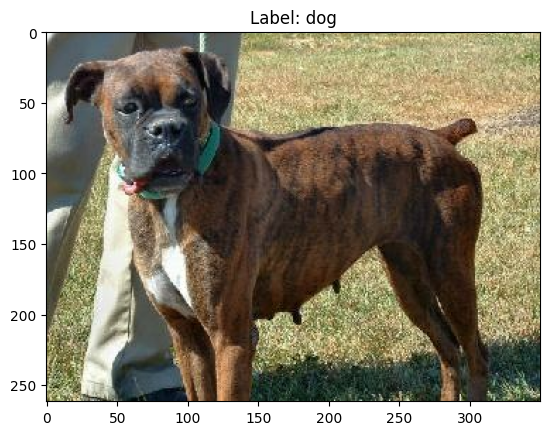

In [ ]:
image, label = next(iter(train_ds))

# Display the image
_ = plt.imshow(image)

# Get the label name using get_label_name function
label_name = get_label_name(label)

# Set the title of the plot to the label name
plt.title(f"Label: {label_name}")

plt.show()
#next(iter(train_ds)) creates an iterator over the train_ds dataset and retrieves the next element, which consists of an image and its label.

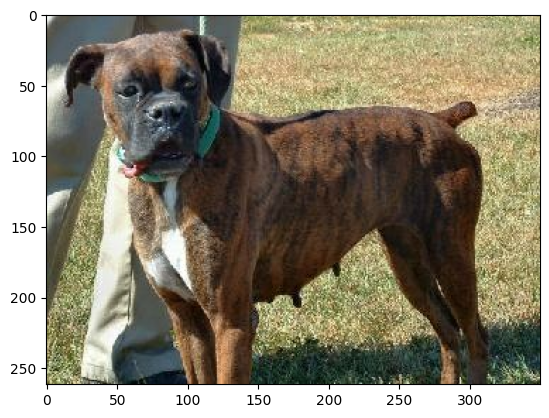

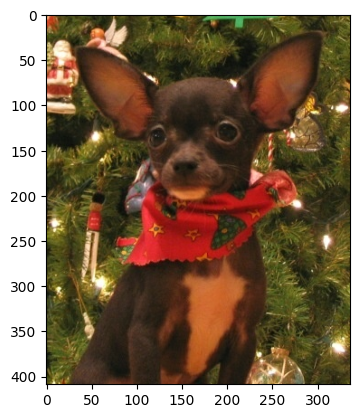

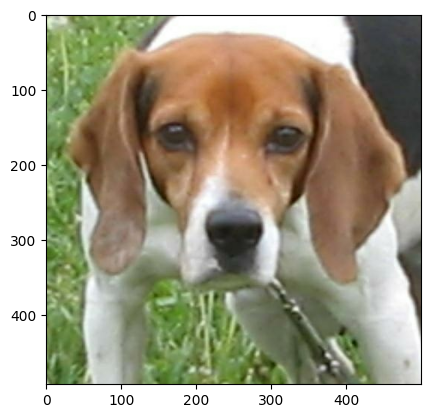

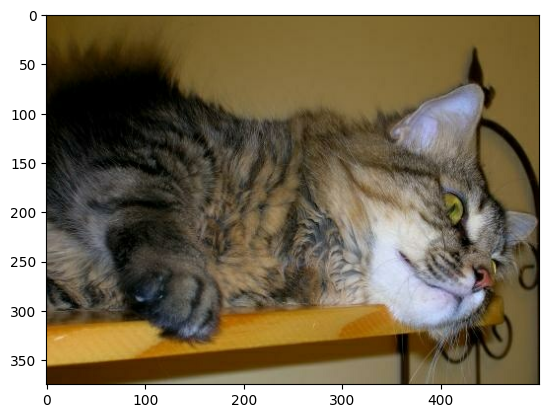

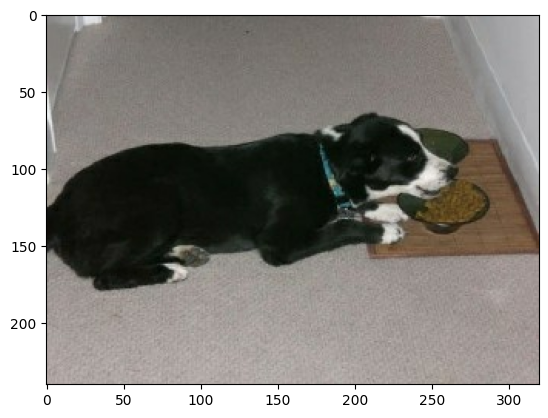

In [ ]:
def display_image(image):
    """Displays an image using matplotlib.pyplot."""
    _ = plt.imshow(image)
    plt.show()
# Create an iterator
iterator = iter(train_ds)

# Display multiple images
for _ in range(5):  # Change the range to display more or fewer images
  image, label = next(iterator)  # Get the next image and label
  display_image(image)

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

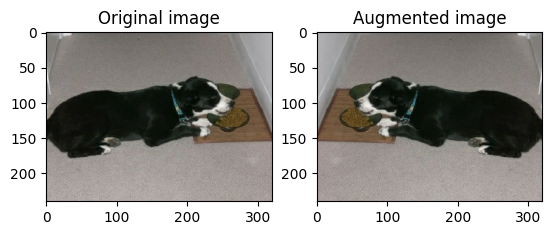

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

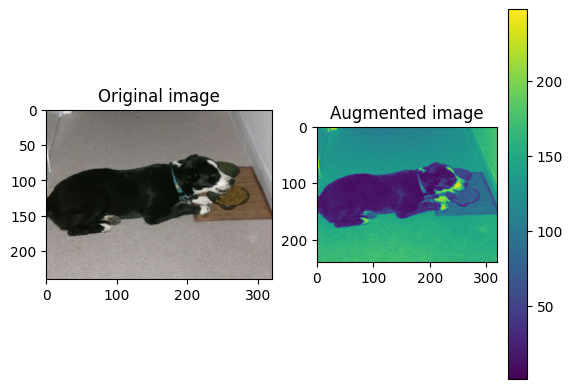

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()
#Grayscale Image - (height, width, 1)
#After tf.squeeze - (height,width)

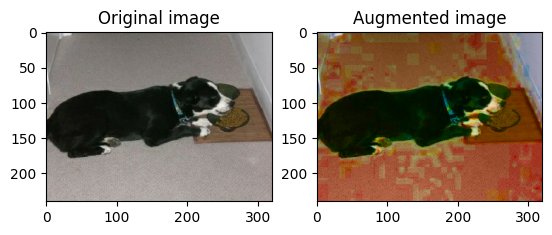

In [ ]:
saturated = tf.image.adjust_saturation(image, 10)
visualize(image, saturated)
#A value greater than 1 increases saturation, while a value less than 1 decreases it. However, a factor of 10 is quite high, which may result in an extremely vivid image.

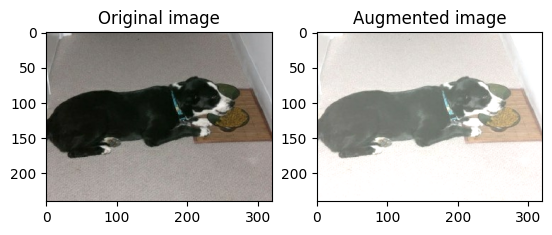

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)
# The value can be positive (to increase brightness) or negative (to decrease brightness)

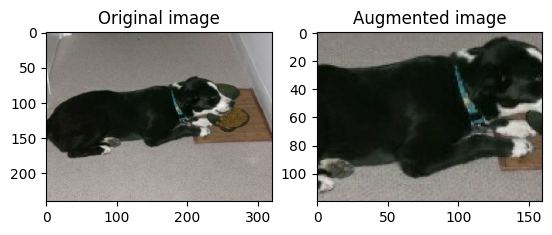

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)
#A value of 0.5 means that 50% of the image's height and width will be retained, effectively cropping it to the center square.

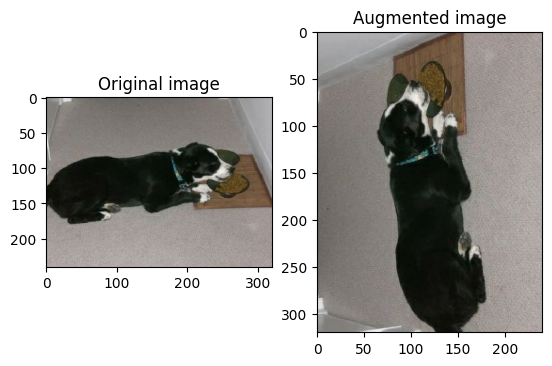

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)
#This function rotates the image 90 degrees counterclockwise

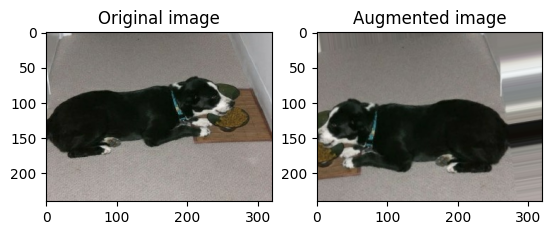

In [ ]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Convert the image to a batch of size 1
image_batch = np.expand_dims(image.numpy(), axis=0)

# Generate augmented images
augmented_images = datagen.flow(image_batch)


# Visualize the first augmented image
augmented_image = next(augmented_images)[0].astype('uint8')  # Get the first augmented image
visualize(image, augmented_image)

#import matplotlib.pyplot as plt
#plt.imshow(augmented_images)
#plt.axis('off')
#plt.show()